In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib


In [2]:
file_path = "data 2.csv"

df = pd.read_csv(file_path)

In [3]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [4]:
# Encode target variable
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # M=1, B=0

In [5]:
# Split dataset into features and target
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [6]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [10]:
# Save model and scaler
joblib.dump(model, 'breast_cancer_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [11]:
# Download model files from Colab
from google.colab import files
files.download('breast_cancer_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

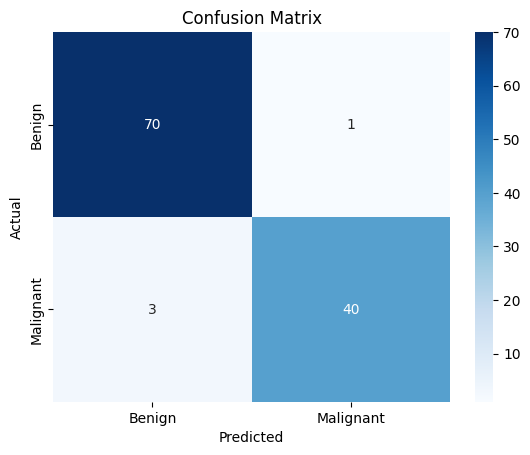

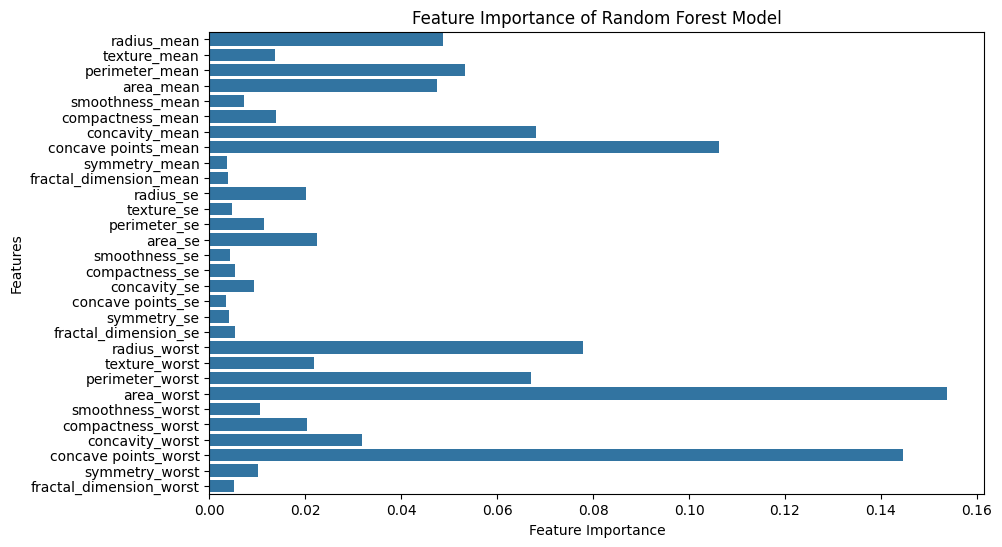

InvalidParameterError: The 'train_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got 1.0 instead.

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


feature_importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of Random Forest Model')
plt.show()

# Visualization: Model Accuracy Over Iterations
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []
test_scores = []
for size in train_sizes:
    X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    model.fit(X_train_sub, y_train_sub)
    train_scores.append(model.score(X_train_sub, y_train_sub))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_scores, label='Testing Accuracy', marker='s')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Different Training Sizes')
plt.legend()
plt.grid()
plt.show()
